<a href="https://colab.research.google.com/github/muhammed-shamil/resnet/blob/main/ResNet_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

My project is object recognization using Resent50.It is a CNN that is 50 layers deep

**convolutional neural network(CNN)**

A Convolutional Neural Network (CNN) is a type of deep learning algorithm that is particularly well-suited for image recognition and processing tasks. It is made up of multiple layers, including convolutional layers, pooling layers, and fully connected layers.
* The convolutional layers are the key component of a CNN, where filters are applied to the input image to extract features such as edges, textures, and shapes. The output of the convolutional layers is then passed through pooling layers, which are used to down-sample the feature maps, reducing the spatial dimensions while retaining the most important information
*CNNs have achieved state-of-the-art performance on a wide range of image recognition tasks, including object classification, object detection, and image segmentation. They are widely used in computer vision, image processing, and other related fields, and have been applied to a wide range of applications, including self-driving cars, medical imaging, and security systems.

Different Types of CNN Models:

* LeNet
* AlexNet
* ResNet
* GoogleNet
* MobileNet
* VGG

Here i take Resnet50 model,

 **RESNET(Residual Networks)**
* Residual Network (ResNet) is a deep learning model used for computer vision applications. It is a Convolutional Neural Network (CNN) architecture designed to support hundreds or thousands of convolutional layers. Previous CNN architectures were not able to scale to a large number of layers, which resulted in limited performance. However, when adding more layers, researchers faced the “vanishing gradient” problem.

**RESNET50**
* ResNet-50 is a convolutional neural network that is 50 layers deep. You can load a pretrained version of the neural network trained on more than a million images from the ImageNet database [1]. The pretrained neural network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals. As a result, the neural network has learned rich feature representations for a wide range of images. The neural network has an image input size of 224-by-224.

**advantages and disadvantages**

* Using ResNet has significantly enhanced the performance of neural networks with more layers and here is the plot of error% when comparing it with neural networks with plain layers. Clearly, the difference is huge in the networks with 34 layers where ResNet-50 has much lower error% as compared to plain-50.

* Convolutional Neural Networks have a major disadvantage — 'Vanishing Gradient Problem'. During backpropagation, the value of gradient decreases significantly, thus hardly any change comes to weights. To overcome this, ResNet is used. It make use of “SKIP CONNECTION”

**Data Set**

The CIFAR-10 data consists of 60,000 32x32 color images in 10 classes, with 6000 images per class. There are 50,000 training images and 10,000 test images in the official data. We have preserved the train/test split from the original dataset.  The provided files are:

* train.7z - a folder containing the training images in png format
* test.7z - a folder containing the test images in png format

The label classes in the dataset are:

* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.

In [ ]:
#Installing the kaggle libraries to access the data CIFAR 10 dataset

!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
#Accessing the google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:

# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
# this the api for the perticular dataset

!kaggle competitions download -c cifar-10

100% 713M/715M [00:18<00:00, 43.2MB/s]
100% 715M/715M [00:18<00:00, 40.4MB/s]


In [ ]:
#we have to print file and the folder of that you have in the current directory

!ls

cifar 10 zip is a compress file,now we have to extract this file.for extracting we will use a libraries called zip file

In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'          #path of this dataset

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

cifar-10.zip  kaggle.json  sampleSubmission.csv  train.7z
drive	      sample_data  test.7z		 trainLabels.csv


In [ ]:
#py7zr is a library and utility to support 7zip archive compression, decompression, encryption and decryption written by Python programming language.

!pip install py7zr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 78.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 13.2 MB/s eta 0:00:00


In [ ]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')     #mention the path of compress file
archive.extractall()     #archive.extractall(path='/content/Training Data')
archive.close()

In [ ]:
!ls

cifar-10.zip  kaggle.json  sampleSubmission.csv  train	   trainLabels.csv
drive	      sample_data  test.7z		 train.7z


Importing the Dependencies

In [ ]:
import os                                #accsesing directories
import numpy as np                       #access numerical python
import pandas as pd                      #importing for data manipulation
from PIL import Image                    #PIL is an abbreviation of Python Imaging Library and it adds image processing to Python
import matplotlib.pyplot as plt          #it is used for  data visualization and graphical plotting library
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [ ]:
#it will list all the files or folders present in perticular directory

filenames = os.listdir('/content/train')

In [ ]:
#chenking the type

type(filenames)

list

In [ ]:
#length of this file name

len(filenames)

50000

In [ ]:
print(filenames[0:5])            #print first five elemnts in this list
print(filenames[-5:])            #print last five elements in this list

['24692.png', '33293.png', '28711.png', '36267.png', '38512.png']
['38070.png', '26625.png', '37624.png', '6225.png', '9819.png']


**Labels Processing**

trainLabel.csv in the form of a csv file,do lets load the csv file into a pandas data frame

In [ ]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [ ]:
labels_df.shape

(50000, 2)

50 thousand rows and 2 colums. columns are id and labels

In [ ]:
labels_df[labels_df['id'] == 24692]  #7796 corresponding labels for this

,id,label
24691,24692,cat


In [ ]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [ ]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [ ]:
labels_df['label'].value_counts()

#10 classes each classes have 5000  images

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [ ]:
labels_df['label']

0              frog
1             truck
2             truck
3              deer
4        automobile
            ...    
49995          bird
49996          frog
49997         truck
49998    automobile
49999    automobile
Name: label, Length: 50000, dtype: object

In [ ]:
labels_df['label'].unique()

#total nine classes are here

array(['frog', 'truck', 'deer', 'automobile', 'bird', 'horse', 'ship',
       'cat', 'dog', 'airplane'], dtype=object)

In [ ]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

#in every classe assign a value.And all airplane changes into 0 like all class are changes in differnts values

In [ ]:
#chenking the values are correct


print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


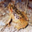

In [ ]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/7796.png')
cv2_imshow(img)

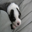

In [ ]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/45888.png')
cv2_imshow(img)

In [ ]:
labels_df[labels_df['id'] == 45888]  #45888 corresponding labels for this

,id,label
45887,45888,dog


In [ ]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
id_list = list(labels_df['id'])

In [ ]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


**Image Processing**

In [ ]:
# convert images to numpy arrays

train_data_folder = '/content/train/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
len(data)

50000

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

#32 width and 32 height,3 shows RGB

(32, 32, 3)

In [ ]:
data[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
# convert image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255  #is performing a common data preprocessing step called "normalization" or "scaling" on the training data x_train.

X_test_scaled = X_test/255

#The purpose of this scaling operation is to normalize the pixel values before feeding them into a machine learning model.
# By scaling the values between 0 and 1, it ensures that all the pixel values are on a similar scale, which can help improve the model's performance during training.
# This is particularly important when working with image data, as pixel values can vary widely depending on the image format and color channels.

In [ ]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

In [ ]:
X_train[0]    #pixles value of x train in 0th index

array([[[209, 210, 203],
        [213, 214, 209],
        [218, 219, 215],
        ...,
        [127,  74,  39],
        [122,  68,  35],
        [116,  63,  32]],

       [[210, 210, 202],
        [213, 214, 207],
        [218, 220, 214],
        ...,
        [124,  70,  35],
        [121,  67,  33],
        [123,  69,  36]],

       [[206, 205, 195],
        [209, 209, 202],
        [213, 215, 209],
        ...,
        [124,  70,  37],
        [131,  77,  42],
        [131,  78,  41]],

       ...,

       [[127, 108,  97],
        [138, 122, 110],
        [141, 127, 118],
        ...,
        [158, 149, 134],
        [161, 156, 151],
        [136, 137, 148]],

       [[145, 130, 119],
        [148, 135, 128],
        [136, 127, 128],
        ...,
        [175, 174, 172],
        [160, 161, 170],
        [143, 148, 164]],

       [[138, 128, 123],
        [140, 132, 136],
        [136, 131, 140],
        ...,
        [150, 154, 169],
        [145, 149, 166],
        [140, 145, 163]]

**Building the Neural Network**

In [ ]:
import tensorflow as tf      #TensorFlow is an end-to-end open source platform for machine learning
from tensorflow import keras #Keras is a high-level, deep learning API developed by Google for implementing neural networks

In [ ]:
num_of_classes = 10

# setting up the layers of Neural Network

model = keras.Sequential([

    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),   #Rectified Linear Unit function is another non-linear activation function that has gained popularity in the deep learning domain
    keras.layers.Dense(num_of_classes, activation='softmax') #Softmax extends this idea into a multi-class world.Softmax assigns decimal probabilities to each class in a multi-class problem.
])

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 9s 3ms/step - loss: 1.9830 - acc: 0.2676 - val_loss: 1.9127 - val_acc: 0.3007
Epoch 2/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.8648 - acc: 0.3156 - val_loss: 1.8183 - val_acc: 0.3325
Epoch 3/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.8330 - acc: 0.3292 - val_loss: 1.8269 - val_acc: 0.3235
Epoch 4/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8192 - acc: 0.3347 - val_loss: 1.8033 - val_acc: 0.3355
Epoch 5/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8074 - acc: 0.3399 - val_loss: 1.8245 - val_acc: 0.3310
Epoch 6/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.7959 - acc: 0.3434 - val_loss: 1.7779 - val_acc: 0.3435
Epoch 7/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.7864 - acc: 0.3493 - val_loss: 1.7695 - val_acc: 0.3643
Epoch 8/10
1125/1125 [==============================] - 4s 3ms

**ResNet50**

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model #loading those models and just some small purpose
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50 #we are importing the actual model
from tensorflow.keras import optimizers #and optimize from tenserflow keras

In [ ]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

In [ ]:
num_of_classes = 10

model = models.Sequential() # This creates a sequential model, which allows you to build the network layer by layer.
model.add(layers.UpSampling2D((2,2))) # the input is upsampled by a factor of 2 in both the height and width dimensions
model.add(layers.UpSampling2D((2,2))) #This operation can be useful for increasing the resolution of the input data.
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base) #This could be a pre-trained CNN such as VGG, ResNet, or Inception, which will be used as a feature extractor.
model.add(layers.Flatten()) #multi-dimensional output from the previous layer into a 1D vector
model.add(layers.BatchNormalization()) #Batch normalization helps in normalizing the activations of the previous layer
model.add(layers.Dense(128, activation='relu')) #Dense layers are fully connected layers, and the specified number of units determines the dimensionality of the layer's output
model.add(layers.Dropout(0.5)) #This adds a dropout layer to the model.
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu')) #This adds another dense layer with 64 units and ReLU activation function.
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax')) #The activation function used is softmax, which produces a probability distribution over the classes, representing the model's predicted probabilities for each class.

In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])
#configuring the model for training by specifying the optimizer, loss function, and evaluation metrics

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)
#train the model on the provided training data
#validation split 0.1 = 10% of the training data will be used for validation, while the remaining 90% will be used for actual training.
#epoch 10 means how many number of times the model will iterate over the entire training dataset during training

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

# It calculates the specified loss function and evaluation metric(s) on the test data

313/313 [==============================] - 39s 117ms/step - loss: 2.7004 - acc: 0.1128
Test Accuracy = 0.1128000020980835


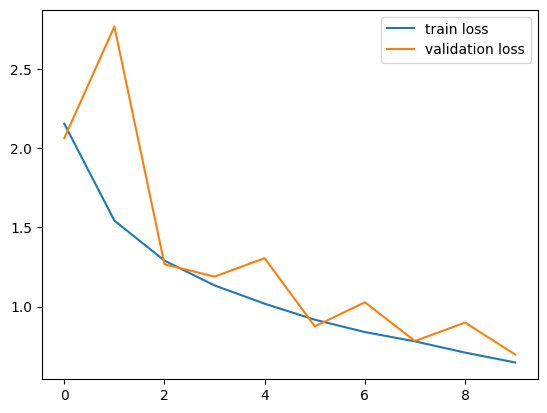

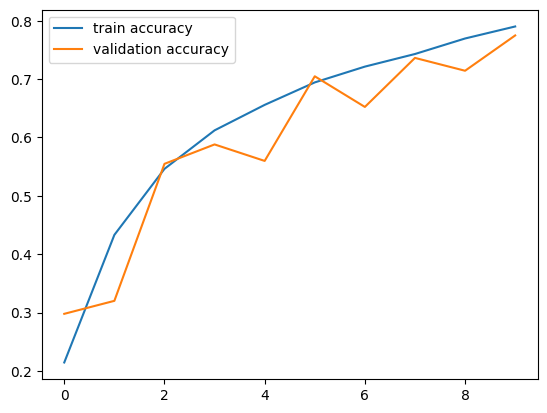

In [ ]:
#this code is used to plot the training and validation loss values as well as the training and validation accuracy values using the matplotlib library

h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()